# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")


1

# We have three types of preprocessed data:
1. Location (includes everything and is a large pickled file)
2. crossing csv (includes only pedestrians)
3. other csv (includes all other trajectories)
4. SceneData (seperate pickled file for each scene of a location)

## 1. Preprocessed Location Data

In [4]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-13-fps-2.5-all.dill")

In [5]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

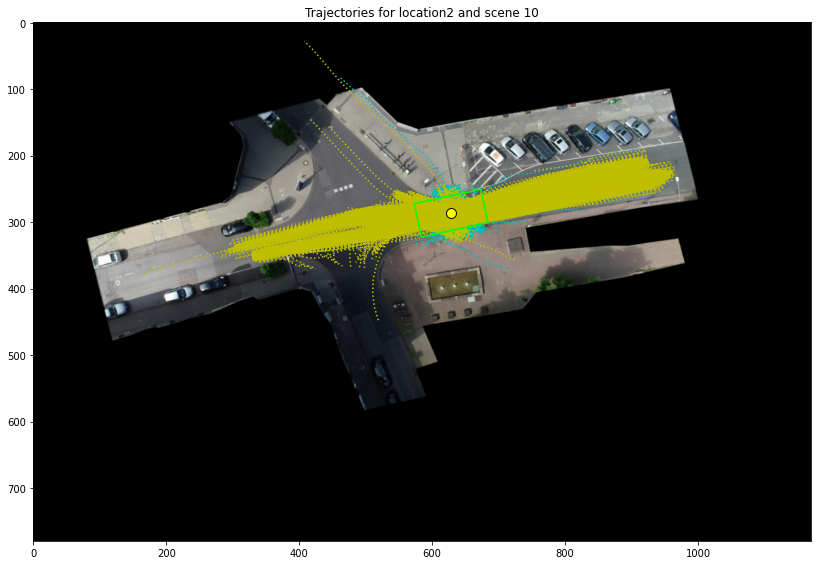

In [6]:
sceneData = loc2dataFromFile.getSceneData(10, 10, 5, refresh=False)
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)

In [7]:
sceneLocalDf = sceneData.getClippedOtherDfs() # others (vehicles, bicycles, trucks)
sceneLocalDf.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY
0,0,18,0,0,0,84.30107,-22.02852,194.94744,1.85331,4.41079,-7.91662,-1.91685,-0.07138,-0.14320,18000,10,5.0,car,23.608273,1.027644
1,1,18,0,10,10,81.09533,-22.81543,194.71567,1.85331,4.41079,-7.92551,-1.97634,0.36129,-0.02402,18000,10,5.0,car,20.308687,0.934230
2,2,18,0,20,20,77.96728,-23.60885,194.48424,1.85331,4.41079,-7.66106,-1.94926,0.64991,0.19578,18000,10,5.0,car,17.083672,0.818075
3,3,18,0,30,30,74.97266,-24.36569,194.61795,1.85331,4.41079,-7.40085,-1.82952,0.58965,0.32040,18000,10,5.0,car,13.996800,0.709549
4,4,18,0,40,40,72.05502,-25.06752,194.03321,1.85331,4.41079,-7.18048,-1.68891,0.62627,0.35153,18000,10,5.0,car,10.996775,0.638568


## 2 & 3, CSV files of pedestrian and other actor trajectories

In [8]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-crossing.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-other.csv")

In [11]:
pedDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,uniqueTrackId,sceneId,roadWidth
0,18,23,286,0,47.32667,-10.09111,316.84658,0.0,0.0,0.85962,-0.78300,-0.00390,-0.08807,1.16265,-0.01672,0.05739,0.06691,18023,10,5.0
1,18,23,296,10,47.67505,-10.41453,316.56418,0.0,0.0,0.85224,-0.82068,-0.01403,-0.08197,1.18310,0.00998,0.04617,0.06917,18023,10,5.0
2,18,23,306,20,48.00758,-10.74370,316.08628,0.0,0.0,0.85307,-0.85612,0.03110,-0.08286,1.20832,0.02507,0.07987,0.03812,18023,10,5.0
3,18,23,316,30,48.35553,-11.09895,315.54290,0.0,0.0,0.87141,-0.88267,0.02578,-0.02409,1.24019,0.01972,0.03528,-0.00086,18023,10,5.0
4,18,23,326,40,48.70924,-11.45365,315.00692,0.0,0.0,0.87700,-0.87984,-0.00496,0.01254,1.24228,0.00216,-0.01238,-0.00536,18023,10,5.0


In [2]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
pedDf.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv'

## 4 Preprocessed Scene Data

In [12]:
from extractors.LocationData import LocationData
scene10 = LocationData.load("../data/location-2", "2022-11-13-fps-2.5-scene-10.dll")

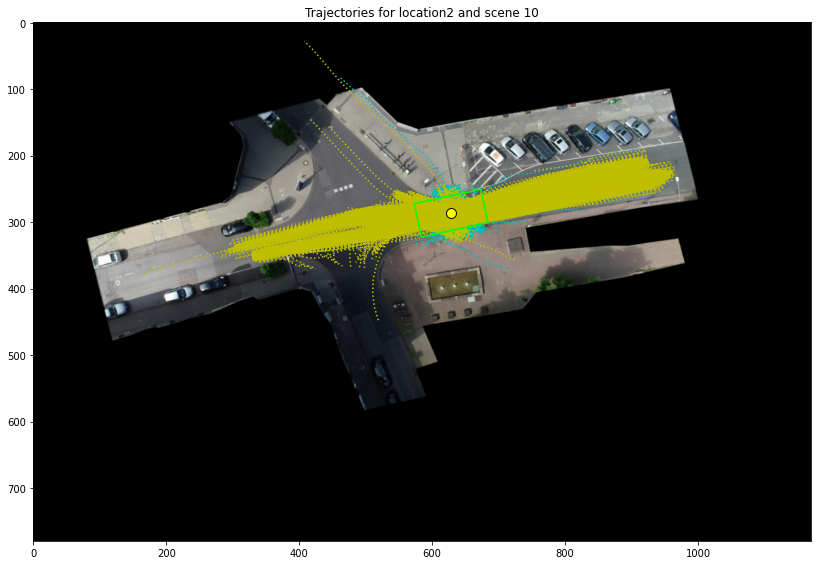

In [13]:

visualizer.showLocationSceneData(scene10, onlyClipped=True, showOthers=True)